In [2]:
import pandas as pd

df = pd.read_csv('/content/sample_data/train.csv')

In [3]:
df

,ID,first_party,second_party,facts,first_party_winner
0,TRAIN_0000,Phil A. St. Amant,Herman A. Thompson,"On June 27, 1962, Phil St. Amant, a candidate ...",1
1,TRAIN_0001,Stephen Duncan,Lawrence Owens,Ramon Nelson was riding his bike when he suffe...,0
2,TRAIN_0002,Billy Joe Magwood,"Tony Patterson, Warden, et al.",An Alabama state court convicted Billy Joe Mag...,1
3,TRAIN_0003,Linkletter,Walker,Victor Linkletter was convicted in state court...,0
4,TRAIN_0004,William Earl Fikes,Alabama,"On April 24, 1953 in Selma, Alabama, an intrud...",1
...,...,...,...,...,...
2473,TRAIN_2473,"HollyFrontier Cheyenne Refining, LLC, et al.","Renewable Fuels Association, et al.",Congress amended the Clean Air Act through the...,1
2474,TRAIN_2474,"Grupo Mexicano de Desarrollo, S. A.","Alliance Bond Fund, Inc.","Alliance Bond Fund, Inc., an investment fund, ...",1
2475,TRAIN_2475,Peguero,United States,"In 1992, the District Court sentenced Manuel D...",0
2476,TRAIN_2476,Immigration and Naturalization Service,St. Cyr,"On March 8, 1996, Enrico St. Cyr, a lawful per...",0


In [4]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from sklearn.model_selection import train_test_split
import numpy as np

Epoch 1/25
70/70 [==============================] - 47s 551ms/step - loss: 0.6498 - accuracy: 0.6565 - val_loss: 0.6223 - val_accuracy: 0.6864
Epoch 2/25
70/70 [==============================] - 33s 470ms/step - loss: 0.6345 - accuracy: 0.6592 - val_loss: 0.6268 - val_accuracy: 0.6610
Epoch 3/25
70/70 [==============================] - 20s 289ms/step - loss: 0.5833 - accuracy: 0.7017 - val_loss: 0.6299 - val_accuracy: 0.6780
Epoch 4/25
70/70 [==============================] - 21s 299ms/step - loss: 0.5151 - accuracy: 0.7402 - val_loss: 0.6907 - val_accuracy: 0.6441
Epoch 5/25
70/70 [==============================] - 28s 395ms/step - loss: 0.4430 - accuracy: 0.7929 - val_loss: 0.7127 - val_accuracy: 0.6695
Epoch 6/25
70/70 [==============================] - 20s 290ms/step - loss: 0.3713 - accuracy: 0.8439 - val_loss: 0.8093 - val_accuracy: 0.6525
Epoch 7/25
70/70 [==============================] - 22s 308ms/step - loss: 0.3246 - accuracy: 0.8623 - val_loss: 0.9366 - val_accuracy: 0.6441

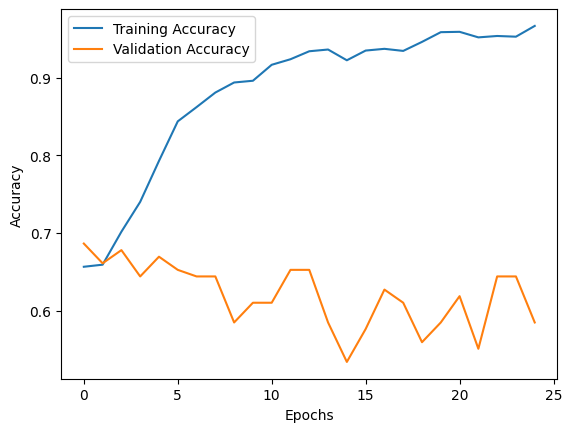

In [12]:
# LSTM
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['facts'])

sequences = tokenizer.texts_to_sequences(df['facts'])
X = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=100))  # Embedding 차원 증가
model.add(LSTM(units=128, return_sequences=True))  # LSTM layer 추가
model.add(LSTM(units=64, return_sequences=True))  # LSTM layer 추가
model.add(LSTM(units=32))  # 추가적인 LSTM layer
model.add(Dropout(0.5))  # Dropout layer 추가
model.add(Dense(units=1, activation='sigmoid'))
# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, df['first_party_winner'], test_size=0.05, random_state=456)

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_split=0.05)

# 훈련 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/25
70/70 [==============================] - 17s 177ms/step - loss: 0.7018 - accuracy: 0.6087 - val_loss: 0.6308 - val_accuracy: 0.6864
Epoch 2/25
70/70 [==============================] - 9s 131ms/step - loss: 0.6707 - accuracy: 0.6333 - val_loss: 0.6294 - val_accuracy: 0.6864
Epoch 3/25
70/70 [==============================] - 7s 105ms/step - loss: 0.6612 - accuracy: 0.6431 - val_loss: 0.6262 - val_accuracy: 0.6864
Epoch 4/25
70/70 [==============================] - 9s 130ms/step - loss: 0.6511 - accuracy: 0.6449 - val_loss: 0.6258 - val_accuracy: 0.6864
Epoch 5/25
70/70 [==============================] - 8s 109ms/step - loss: 0.6246 - accuracy: 0.6570 - val_loss: 0.6254 - val_accuracy: 0.6864
Epoch 6/25
70/70 [==============================] - 9s 124ms/step - loss: 0.5652 - accuracy: 0.7133 - val_loss: 0.6550 - val_accuracy: 0.6525
Epoch 7/25
70/70 [==============================] - 9s 130ms/step - loss: 0.5081 - accuracy: 0.7697 - val_loss: 0.6817 - val_accuracy: 0.6780
Epoch

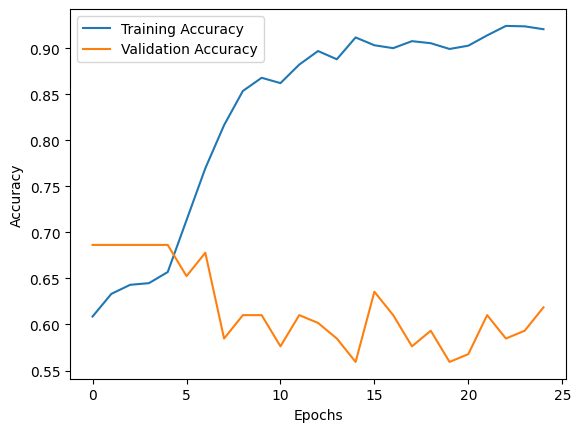

In [18]:
#RNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout, Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 텍스트 전처리
max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['facts'])

sequences = tokenizer.texts_to_sequences(df['facts'])
X = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# 모델 구축
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=100))  # Embedding 차원 증가
model.add(SimpleRNN(units=128, return_sequences=True))  # Simple RNN layer 추가
model.add(SimpleRNN(units=64, return_sequences=True))  # Simple RNN layer 추가
model.add(SimpleRNN(units=32, return_sequences=True))  # 추가적인 Simple RNN layer
model.add(SimpleRNN(units=16))  # 추가적인 Simple RNN layer
model.add(Dropout(0.5))  # Dropout layer 추가
model.add(Dense(units=1, activation='sigmoid'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, df['first_party_winner'], test_size=0.05, random_state=456)

# 모델 훈련
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=32,
                    validation_split=0.05)

# 훈련 결과 시각화
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# 테스트 데이터에 대한 예측
X_test = pd.read_csv('/content/sample_data/test.csv')

max_words = 1000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_test['facts'])

sequences = tokenizer.texts_to_sequences(X_test['facts'])
X_test = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

predictions = model.predict(X_test)

# 예측값을 확률에서 이진 값으로 변환
predicted_labels = (predictions > 0.5).astype(int)

# 예측 결과 출력
#result_df = pd.DataFrame({'Actual': y_test, 'Predicted': predicted_labels.flatten()})
print(predicted_labels)

39/39 [==============================] - 2s 28ms/step
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [20]:
len(predicted_labels)

1240

In [21]:
sample_submission = pd.read_csv('/content/sample_data/sample_submission.csv')

In [22]:
sample_submission['first_party_winner'] = predicted_labels.flatten()

# 결과 확인
print(sample_submission)

             ID  first_party_winner
0     TEST_0000                   1
1     TEST_0001                   1
2     TEST_0002                   0
3     TEST_0003                   0
4     TEST_0004                   0
...         ...                 ...
1235  TEST_1235                   1
1236  TEST_1236                   0
1237  TEST_1237                   0
1238  TEST_1238                   1
1239  TEST_1239                   1

[1240 rows x 2 columns]


In [23]:
sample_submission.to_csv('predicted_results3.csv', index=False)